In [1]:
import pandas as pd
import glob
import re
import numpy as np
from pathlib import Path
import ast


In [2]:
path = Path(".") / "bonds" 

bonds = list(path.glob("*.csv"))

In [3]:
def converter(x):
    if isinstance(x, str):
        if x == "-":
            return np.nan
        elif "K" in x:
            return ast.literal_eval(x.replace("K", ""))
        elif "M" in x:
            x=ast.literal_eval(x.replace("M", ""))
            return x*1e3
    else:
        return x

In [4]:
l = []
for i, b in enumerate(bonds):
    # "Date","Price","Open","High","Low","Vol.","Change %"
    bond_name = '_'.join(b.stem.split()[0:2])
    temp = pd.read_csv(b, names=['Date', bond_name, "Open", "High", "Low", "Vol", "Change"], usecols=['Date', bond_name, "Vol"], 
                     header = 0, parse_dates=['Date'], index_col='Date')
    
    temp.loc[:, "Vol"] = temp.loc[:, "Vol"].apply(converter)
    mean = temp.loc[:, "Vol"].mean()
    print("{} - shape = {}, daily volume average = {:.2}".format(b.stem, temp.shape, mean))
    if mean > 1:
        l.append(temp[bond_name])
    
df = pd.concat(l, axis=1)

Eurex Swiss CHF Government Bond Future Historical Data - shape = (1198, 2), daily volume average = 0.24
Euribor Futures Historical Data - shape = (1782, 2), daily volume average = 2.1e+01
Euro BOBL Futures Historical Data - shape = (1765, 2), daily volume average = 4.3e+02
Euro BTP Futures Historical Data - shape = (1764, 2), daily volume average = 9.3e+01
Euro Bund Futures Historical Data - shape = (1764, 2), daily volume average = 6.5e+02
Euro OAT Futures Historical Data - shape = (1760, 2), daily volume average = 9.1e+01
Euro SCHATZ Futures Historical Data - shape = (1764, 2), daily volume average = 2.8e+02
Euro-Buxl Futures Historical Data - shape = (1781, 2), daily volume average = 4.3e+01
Japan Government Bond Futures Historical Data - shape = (1823, 2), daily volume average = 3e+01
One-Month EONIA Futures Historical Data - shape = (1765, 2), daily volume average = nan
Short Sterling Futures Historical Data - shape = (1693, 2), daily volume average = 3e+01
Short-Term Euro-BTP Fut

In [5]:
df

,Euribor_Futures,Euro_BOBL,Euro_BTP,Euro_Bund,Euro_OAT,Euro_SCHATZ,Euro-Buxl_Futures,Japan_Government,Short_Sterling,Short-Term_Euro-BTP,UK_Gilt,US_10,US_2,US_30,US_5
Date,,,,,,,,,,,,,,,
2014-01-01,99.72,124.46,114.78,139.24,NaN,110.295,NaN,143.13,99.43,NaN,106.56,NaN,109.91,128.01,119.25
2014-01-02,99.74,124.41,115.81,139.12,131.55,110.295,121.60,143.26,99.43,109.42,106.52,123.22,109.91,128.62,119.41
2014-01-03,99.74,124.45,116.05,139.09,131.62,110.295,121.40,143.27,99.43,109.52,106.60,123.17,109.88,128.53,119.35
2014-01-06,99.72,124.61,116.13,139.54,131.88,110.295,121.96,143.54,99.44,109.46,107.21,123.47,109.90,129.03,119.51
2014-01-07,99.71,124.72,116.68,139.76,132.22,110.295,122.28,143.81,NaN,109.63,107.44,123.69,109.91,129.31,119.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-26,100.53,135.48,151.40,175.51,170.16,112.355,227.00,152.10,99.96,114.02,135.44,138.45,110.41,173.45,125.61
2020-11-27,100.53,135.49,151.50,175.50,170.13,112.350,227.16,152.05,99.96,114.02,135.26,138.55,110.41,173.88,125.67
2020-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.06,NaN,NaN,NaN,138.16,110.40,174.95,125.98


In [6]:
df.isna().sum()


Euribor_Futures        107
Euro_BOBL              124
Euro_BTP               125
Euro_Bund              125
Euro_OAT               129
Euro_SCHATZ            125
Euro-Buxl_Futures      108
Japan_Government        66
Short_Sterling         196
Short-Term_Euro-BTP    109
UK_Gilt                137
US_10                   70
US_2                    61
US_30                   65
US_5                    64
dtype: int64

In [7]:
df.isna().sum()/df.shape[0]


Euribor_Futures        0.056644
Euro_BOBL              0.065643
Euro_BTP               0.066173
Euro_Bund              0.066173
Euro_OAT               0.068290
Euro_SCHATZ            0.066173
Euro-Buxl_Futures      0.057173
Japan_Government       0.034939
Short_Sterling         0.103759
Short-Term_Euro-BTP    0.057702
UK_Gilt                0.072525
US_10                  0.037057
US_2                   0.032292
US_30                  0.034410
US_5                   0.033880
dtype: float64

In [8]:
# df.drop('Eurex_Swiss', axis=1, inplace=True)
df = df.ffill().dropna()
df.isna().sum()

Euribor_Futures        0
Euro_BOBL              0
Euro_BTP               0
Euro_Bund              0
Euro_OAT               0
Euro_SCHATZ            0
Euro-Buxl_Futures      0
Japan_Government       0
Short_Sterling         0
Short-Term_Euro-BTP    0
UK_Gilt                0
US_10                  0
US_2                   0
US_30                  0
US_5                   0
dtype: int64

In [9]:
df.shape

(1888, 15)

In [10]:
df.to_csv('bonds.csv')

## Correlation analysis

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import GraphicalLassoCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()), ("glasso", GraphicalLassoCV(cv=10))
])
returns = df.apply(np.log).diff().dropna()

In [12]:
returns.describe()

,Euribor_Futures,Euro_BOBL,Euro_BTP,Euro_Bund,Euro_OAT,Euro_SCHATZ,Euro-Buxl_Futures,Japan_Government,Short_Sterling,Short-Term_Euro-BTP,UK_Gilt,US_10,US_2,US_30,US_5
count,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000
mean,0.000004,0.000045,0.000141,0.000123,0.000135,0.000010,0.000330,0.000031,0.000003,0.000021,0.000123,0.000061,0.000003,0.000163,0.000029
std,0.000088,0.001654,0.005096,0.003324,0.003626,0.000320,0.007823,0.001121,0.000184,0.001928,0.003951,0.002807,0.002154,0.006356,0.001836
min,-0.000699,-0.018829,-0.046395,-0.027067,-0.025645,-0.002599,-0.050666,-0.008670,-0.001308,-0.037274,-0.030615,-0.014592,-0.062687,-0.041087,-0.009292
25%,0.000000,-0.000459,-0.001830,-0.001229,-0.001231,-0.000134,-0.003444,-0.000406,0.000000,-0.000354,-0.001963,-0.001503,-0.000277,-0.003069,-0.000929
50%,0.000000,0.000000,0.000070,0.000062,0.000129,0.000000,0.000145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000187,0.000000
75%,0.000000,0.000691,0.002655,0.001828,0.001882,0.000136,0.004645,0.000531,0.000000,0.000450,0.002249,0.001651,0.000278,0.003409,0.001005
max,0.000798,0.013936,0.040573,0.018855,0.038545,0.002752,0.066769,0.006193,0.001911,0.025410,0.030774,0.016505,0.062687,0.098859,0.008854


In [13]:
pipe.fit(returns.values)
glasso = pipe.steps[-1][-1]

print("alpha_cv = {}".format(glasso.alpha_))

alpha_cv = 0.2034497625738668


In [14]:
cov = glasso.covariance_
cov = pd.DataFrame(cov, index=returns.columns, columns=returns.columns)

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_pandas_adjacency(cov)

{'Euribor_Futures': array([0.07077282, 0.01533424]), 'Euro_BOBL': array([0.06292673, 0.01141359]), 'Euro_BTP': array([0.07185305, 0.01440307]), 'Euro_Bund': array([0.0813592 , 0.02424675]), 'Euro_OAT': array([0.07080031, 0.02239709]), 'Euro_SCHATZ': array([0.06595848, 0.02007054]), 'Euro-Buxl_Futures': array([0.07559664, 0.00375907]), 'Japan_Government': array([0.07105703, 0.01586048]), 'Short_Sterling': array([0.06292673, 0.00375907]), 'Short-Term_Euro-BTP': array([0.07033778, 0.01489811]), 'UK_Gilt': array([0.07712949, 0.01229967]), 'US_10': array([0.0697461 , 0.00913033]), 'US_2': array([0.0706198 , 0.01545934]), 'US_30': array([0.07543687, 0.01808213]), 'US_5': array([0.06640571, 0.01520227])}


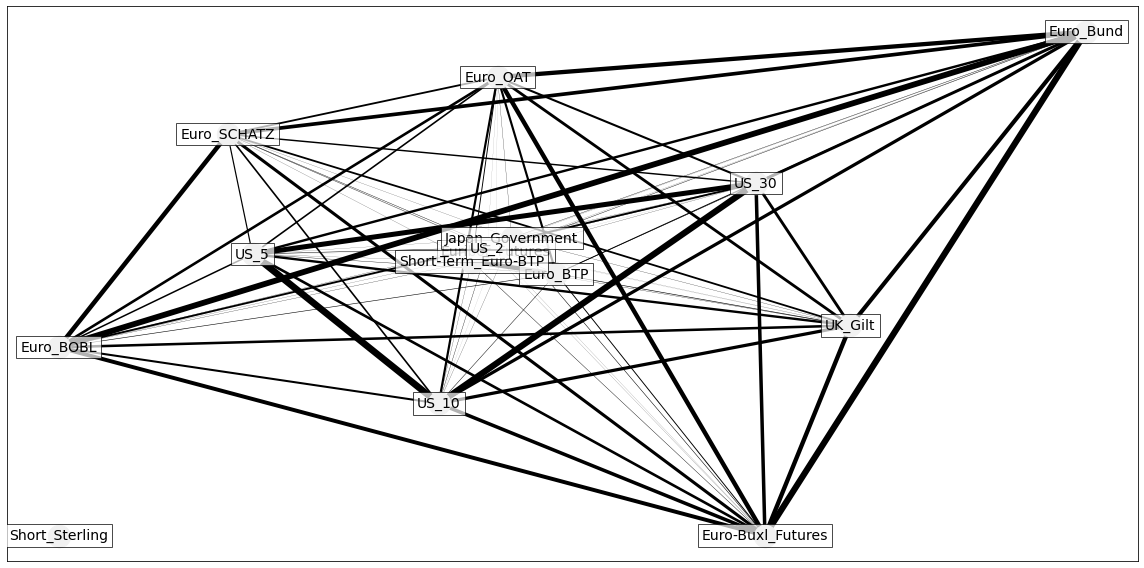

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

width=[10*d["weight"] for (u, v, d) in G.edges(data=True)]
#pos = nx.spring_layout(G, seed=12)  # positions for all nodes - seed for reproducibility
#pos["Short_Sterling"] -= 0.7
pos = nx.kamada_kawai_layout(G)
pos["Short_Sterling"] = np.array([min(val[0] for key, val in pos.items() if key!="Short_Sterling"), 
                                  min(val[1] for key, val in pos.items() if key!="Short_Sterling")])
print(pos)
# nodes
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=500, node_color="lightgray")

# edges
nx.draw_networkx_edges(G, pos, ax=ax, width=width)

# labels
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G, pos, ax=ax, font_size=14, font_family="sans-serif", bbox=label_options)
fig.tight_layout()